# Домашнее задание №5. Кириллов Алексей

# Задание 1

Рассмотрим простейшую линейную регрессию
$$
y_i = \alpha + \beta x_i + \varepsilon_i, \quad i = \overline{1, n}
$$
где $\varepsilon_i - \text{i.i.d.} \sim \mathcal{N}(0, \sigma^2)$ и $x_1, \dots, x_n$ - детерминированные точки, хотя бы две из которых различны. Обозначим через $\hat \alpha, \hat \beta$ оценки параметров $\alpha, \beta$, полученные методом наименьших квадратов
$$
(\hat \alpha, \hat \beta) := \operatorname{argmin}_{\alpha, \beta} \mathcal{R} (\alpha, \beta),
\quad \mathcal{R} (\alpha, \beta) := \sum_{i=1}^n (y_i - \alpha - \beta x_i)^2
$$
Докажите, что эти оценки имеют нормальное распределение и являются несмещёнными оценками параметров $\alpha, \beta$.

*Решение.* Найдем аналитические выражения для $\hat \alpha, \hat \beta$. Для этого продифференцируем по $\alpha, \beta$ функционал $\mathcal{R} (\alpha, \beta)$ и приравняем к нулю:
$$
\begin{cases}
\frac{\partial \mathcal{R}}{\partial \alpha} = -2 \sum_{i=1}^n (y_i - \alpha - \beta x_i) = 0 \\
\frac{\partial \mathcal{R}}{\partial \beta} = -2 \sum_{i=1}^n (y_i - \alpha - \beta x_i) x_i = 0
\end{cases}
$$
Отсюда получаем
$$
\begin{cases}
    \alpha +  \beta \bar x = \bar y \\
    \alpha \bar x + \beta \overline{x^2} = \overline{xy}
\end{cases}
$$
где
$$
\bar x = {\sum_{i=1}^n x_i \over n}, \quad \bar y = {\sum_{i=1}^n y_i \over n}, \quad \overline{x^2} = {\sum_{i=1}^n x_i^2 \over n}, \quad \overline{xy} = {\sum_{i=1}^n x_i y_i \over n}
$$
Преобразовывая, находим
$$
\begin{cases}
    \hat \alpha = \bar y - \hat \beta \bar x \\
    \hat \beta = \frac{\overline{xy} - \bar x \bar y}{\overline{x^2} - \bar x^2}
\end{cases}
$$

Проверим, что в этих точках у функции минимум. Для этого найдем вторые производные:
$$
\begin{cases}
    \frac{\partial^2 \mathcal{R}}{\partial \alpha^2} = 2n \\
    \frac{\partial^2 \mathcal{R}}{\partial \beta^2} = 2 \sum_{i=1}^n x_i^2 \\
    \frac{\partial^2 \mathcal{R}}{\partial \alpha \partial \beta} = 2 \sum_{i=1}^n x_i
\end{cases}
$$
Посчитаем определитель гессиана в точке $(\hat \alpha, \hat \beta)$:
$$
\begin{vmatrix} 2n & 2 \sum_{i=1}^n x_i \\ 2 \sum_{i=1}^n x_i & 2 \sum_{i=1}^n x_i^2 \end{vmatrix} = 2n \cdot \left(2 \sum_{i=1}^n x_i^2\right) - \left(2 \sum_{i=1}^n x_i \right)\cdot \left( 2 \sum_{i=1}^n x_i\right) = 2n \cdot \left(2 \sum_{i=1}^n x_i^2\right)  - 4 \left( \sum_{i=1}^n x_i \right)^2 = 4n \left [{\sum_{i=1}^n x_i^2 \over n} - \left( {\sum_{i=1}^n x_i \over n} \right)^2 \right ] > 0
$$
по неравенству о средних. Значит, в точке $(\hat \alpha, \hat \beta)$ находится локальный минимум. А так как функция $\mathcal{R}$ везде дважды дифференцируема, то этот минимум будет глобальным и единственным.

Проверим, что $\hat \alpha, \hat \beta$ имеют нормальное распределение. Будем пользоваться тем, что 1) сумма нормальных величин нормальна и 2) нормальная величина, умоноженная на константу, также нормальна. Запишем серию переходов:
$$
\begin{align*}
y_i &\sim \mathcal{N} \\
\Rightarrow {\sum y_i \over n} &\sim \mathcal{N}, \text{ то есть } \bar y \sim \mathcal{N} \\
x_i y_i &\sim \mathcal{N} \Rightarrow {\sum x_i y_i \over N} \sim \mathcal{N}, \text{ то есть } \overline{xy} \sim \mathcal{N} \\
\end{align*}
$$
Т.к. $\bar x, \overline{x^2}$ - константы, то $\hat \alpha, \hat \beta$ - линейные комбинации нормальных величин, а значит, они имеют нормальное распределение.

Теперь докажем несмещенность $\hat \alpha, \hat \beta$. Для этого найдем матожидание $\hat \alpha, \hat \beta$:
$$
\mathbb{E} \hat \beta = \mathbb{E} {\overline{xy} - \bar x \bar y \over \overline{x^2} - \bar x^2} = {1 \over \overline{x^2} - \bar x^2} \Big ( \mathbb{E} \overline {xy} - \mathbb{E} \bar x \bar y \Big)
$$
$$
\mathbb{E} \bar x \bar y = \mathbb{E} \Big[\sum {x (\beta x_i + \alpha + \varepsilon_i) \over n} \Big] = \sum {\mathbb{E} x_i (\beta x_i + \alpha + \varepsilon_i) \over n} = \sum {\beta x_i^2 + \alpha x_i \over n} = \beta \overline{x^2} + \alpha \bar x
$$
$$
\mathbb{E} [\bar x \bar y] = \bar x \mathbb{y} = \bar x \cdot (\beta \bar x + \alpha)
$$
Поэтому
$$
\mathbb{E} \hat \beta = {1 \over \overline{x^2} - \bar x^2}   \Big( (\beta \overline{x^2} + \alpha \bar x) - (\beta \bar x^2 + \alpha \bar x) \Big) = \beta
$$
Найдем матожидание $\hat \alpha$:
$$
\mathbb{E} \hat \alpha = \mathbb{E} [\bar y -  \hat \beta \bar x] = (\alpha + \beta \bar x ) - \bar x \mathbb{E} \hat \beta = \alpha + \beta \bar x - \beta \bar x = \alpha
$$

# Задание 2

База данных PimaIndiansDiabetes2 содержит данные о различных медицинских показателях 768 жителей Индии. Информация о базе доступна по [ссылке](https://rdrr.io/cran/mlbench/man/PimaIndiansDiabetes.html) Целью этого упражнения является анализ взаимосвязи переменной diabetes (индикатор болезни диабетом) с остальными переменными.

In [1]:
# install.packages("mlbench")
library(mlbench)
data(PimaIndiansDiabetes2)

In [2]:
summary(PimaIndiansDiabetes2)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            mass          pedigree           age        diabetes 
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00            
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 M

In [3]:
head(PimaIndiansDiabetes2)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,NA,33.6,0.627,50,pos
2,1,85,66,29,NA,26.6,0.351,31,neg
3,8,183,64,NA,NA,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,NA,NA,25.6,0.201,30,neg


### Пункт 1

При помощи инструментов weights of evidence и information value разделите все переменные, кроме diabetes, на 3 группы (используя diabetes как event), и определите переменные, для которых information value превышает 0.4.

In [4]:
library(Information)

In [5]:
PimaIndiansDiabetes2$diabetes = as.numeric(PimaIndiansDiabetes2$diabetes) - 1
x = PimaIndiansDiabetes2

IV=create_infotables(data=x, y="diabetes",bins=3)
IV$Summary

,Variable,IV
,<chr>,<dbl>
2,glucose,0.9871522
8,age,0.4676842
6,mass,0.4640067
5,insulin,0.3566771
4,triceps,0.2725837
1,pregnant,0.1792761
7,pedigree,0.1295080
3,pressure,0.1208864


Information value > 0.4 для переменных gluscore, age, mass

### Пункт 2

Перекодируйте выбранные на предыдущем шаге переменные в соответствии с полученными группами. Исследуйте зависимость каждой из этих переменных c фактом наличия диабета при помощи анализа соответствующих таблиц сопряженности.

In [6]:
IV$Tables$glucose

glucose,N,Percent,WOE,IV
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
NA,5,0.006510417,0.2181560,0.0003190939
"[44,104]",246,0.320312500,-1.4696137,0.4959518133
"[105,129]",259,0.337239583,-0.2365801,0.5140943327
"[130,199]",258,0.335937500,1.1468693,0.9871522269


In [7]:
glucose_int = c(105, 130, 200)

In [8]:
IV$Tables$age

age,N,Percent,WOE,IV
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"[21,24]",219,0.2851562,-1.1788336,0.3068838
"[25,35]",279,0.3632812,0.0414055,0.3075105
"[36,81]",270,0.3515625,0.6532529,0.4676842


In [9]:
age_int = c(25, 36, 82)

In [10]:
IV$Tables$mass

mass,N,Percent,WOE,IV
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
NA,11,0.01432292,-0.8804563,0.009277644
"[18.2,28.9]",249,0.32421875,-1.1220472,0.330116168
"[29,34.8]",254,0.33072917,0.3221457,0.365869535
"[34.9,67.1]",254,0.33072917,0.5290625,0.464006687


In [26]:
mass_int = c(29, 34.9, 70)

Для того, чтобы проверить, что делаем все правильно, возьмем самую плохую переменную - pressure

In [35]:
IV$Tables$pressure

pressure,N,Percent,WOE,IV
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
NA,35,0.04557292,0.4517709,0.009804102
"[24,66]",238,0.30989583,-0.5088927,0.082871982
"[68,76]",245,0.31901042,0.0269342,0.083104340
"[78,122]",250,0.32552083,0.3336053,0.120886388


In [36]:
pressure_int = c(68, 78, 150)

Закодируем переменные в соответствии с группами:

In [37]:
x = PimaIndiansDiabetes2
x$glucose_encoded <- as.integer(rep(NA, 768))
x$age_encoded <- as.integer(rep(NA, 768))
x$mass_encoded <- as.integer(rep(NA, 768))
x$pressure_encoded <- as.integer(rep(NA, 768))
my_infinity <- 100000

for (i in 1:length(glucose_int)) {
    ind <- which(x$glucose < glucose_int[i])
    x$glucose_encoded[ind] = i
    x$glucose[ind] = my_infinity
}

for (i in 1:length(age_int)) {
    ind <- which(x$age < age_int[i])
    x$age_encoded[ind] = i
    x$age[ind] = my_infinity
}

for (i in 1:length(mass_int)) {
    ind <- which(x$mass < mass_int[i])
    x$mass_encoded[ind] = i
    x$mass[ind] = my_infinity
}

for (i in 1:length(pressure_int)) {
    ind <- which(x$pressure < pressure_int[i])
    x$pressure_encoded[ind] = i
    x$pressure[ind] = my_infinity
}


Критерий Кси-квадрат:

In [32]:
chisq.test(table(x$glucose_encoded, x$diabetes))


	Pearson's Chi-squared test

data:  table(x$glucose_encoded, x$diabetes)
X-squared = 153.43, df = 2, p-value < 2.2e-16


Вероятность диабета зависит от уровня глюкозы

In [33]:
chisq.test(table(x$mass_encoded, x$diabetes))


	Pearson's Chi-squared test

data:  table(x$mass_encoded, x$diabetes)
X-squared = 68.412, df = 2, p-value = 1.395e-15


Вероятность диабета зависит от веса человека

In [34]:
chisq.test(table(x$age_encoded, x$diabetes))


	Pearson's Chi-squared test

data:  table(x$age_encoded, x$diabetes)
X-squared = 71.414, df = 2, p-value = 3.108e-16


Вероятность диабета зависит от возраста человека

In [38]:
chisq.test(table(x$pressure_encoded, x$diabetes))


	Pearson's Chi-squared test

data:  table(x$pressure_encoded, x$diabetes)
X-squared = 18.566, df = 2, p-value = 9.297e-05


Вероятность диабета зависит от уровня давление, но, как видим, значительно меньше, чем от уровня глюкозы, массы и возраста. Собственно, это и ожидалось

### Пункт 3
Для описания зависимости переменной diabetes от всех остальных переменных постройте модели логистической регрессии по всем переменным и отдельно по каждой перекодированной переменной. Определите, какая из построенных моделей лучше, используя ROC AUC

In [15]:
# install.packages("PRROC")
library(PRROC)

In [42]:
x_encoded = x
head(x_encoded)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,glucose_encoded,age_encoded,mass_encoded,pressure_encoded
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,6,1e+05,1e+05,35,NA,1e+05,0.627,1e+05,1,3,3,2,2
2,1,1e+05,1e+05,29,NA,1e+05,0.351,1e+05,0,1,2,1,1
3,8,1e+05,1e+05,NA,NA,1e+05,0.672,1e+05,1,3,2,1,1
4,1,1e+05,1e+05,23,94,1e+05,0.167,1e+05,0,1,1,1,1
5,0,1e+05,1e+05,35,168,1e+05,2.288,1e+05,1,3,2,3,1
6,5,1e+05,1e+05,NA,NA,1e+05,0.201,1e+05,0,2,2,1,2


#### Логистическая регрессия по всем переменным

In [43]:
x = PimaIndiansDiabetes2
x$diabetes = as.integer(x$diabetes)
# for each columns of x fill NA values with median
for (i in 1:ncol(x)) {
    x[, i][is.na(x[, i])] <- median(x[, i], na.rm = TRUE)
}
head(x)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,148,72,35,125,33.6,0.627,50,1
2,1,85,66,29,125,26.6,0.351,31,0
3,8,183,64,29,125,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,29,125,25.6,0.201,30,0


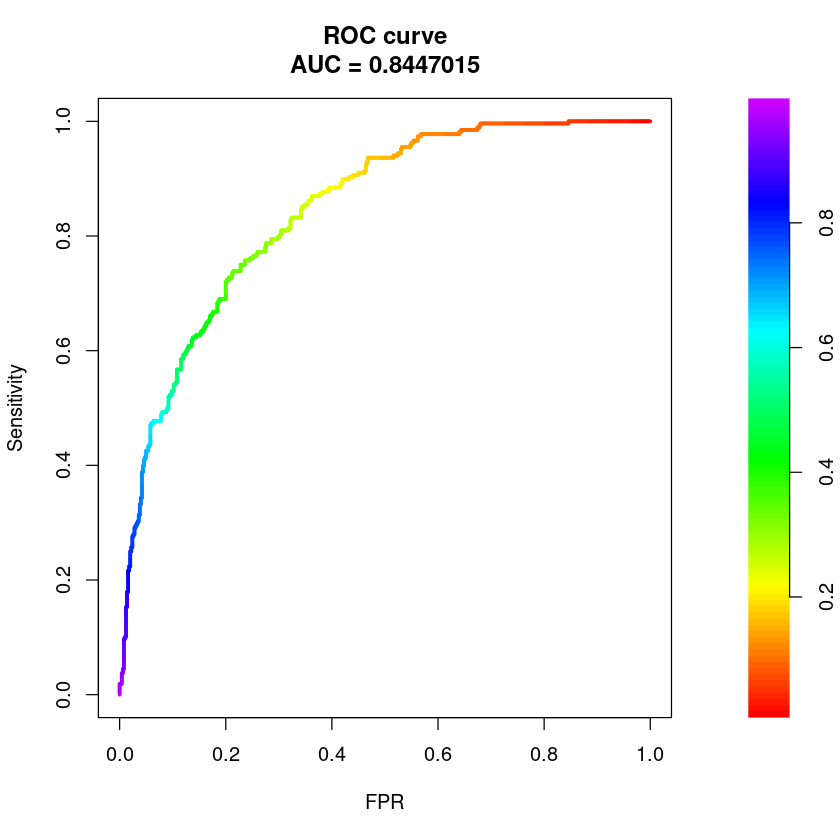

In [44]:
logist=glm(diabetes~., data=x, family="binomial")
ans=predict(logist, type="response")
plot(roc.curve(scores.class0=ans, weights.class0=x$diabetes, curve=TRUE))

Хороший результат

#### Логистическая регрессия по лучшим переменным

In [48]:
x = x[, c(2,6, 8, 9)]
head(x)

,glucose,mass,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>
1,148,33.6,50,1
2,85,26.6,31,0
3,183,23.3,32,1
4,89,28.1,21,0
5,137,43.1,33,1
6,116,25.6,30,0


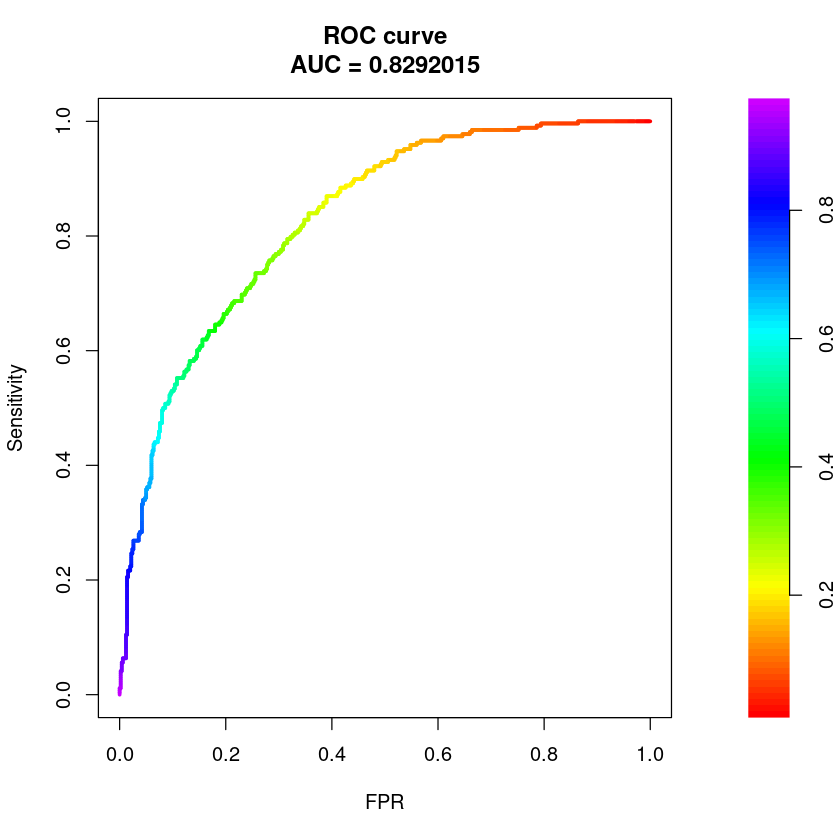

In [49]:
logist=glm(diabetes~., data=x, family="binomial")
ans=predict(logist, type="response")
plot(roc.curve(scores.class0=ans, weights.class0=x$diabetes, curve=TRUE))

Стало немного хуже, но в целом качество сохранилось. Тем более если учесть, что мы уменьшили количество переменных в 3 раза + у нас нет тестовой выборки

#### Логистическая регрессия по закодированным значениям лучших переменных

In [60]:
x = x_encoded[, c(9, 10, 11, 12)]
# for each columns of x fill NA values with median
for (i in 1:ncol(x)) {
    x[, i][is.na(x[, i])] <- median(x[, i], na.rm = TRUE)
}
head(x)

,diabetes,glucose_encoded,age_encoded,mass_encoded
,<dbl>,<int>,<dbl>,<int>
1,1,3,3,2
2,0,1,2,1
3,1,3,2,1
4,0,1,1,1
5,1,3,2,3
6,0,2,2,1


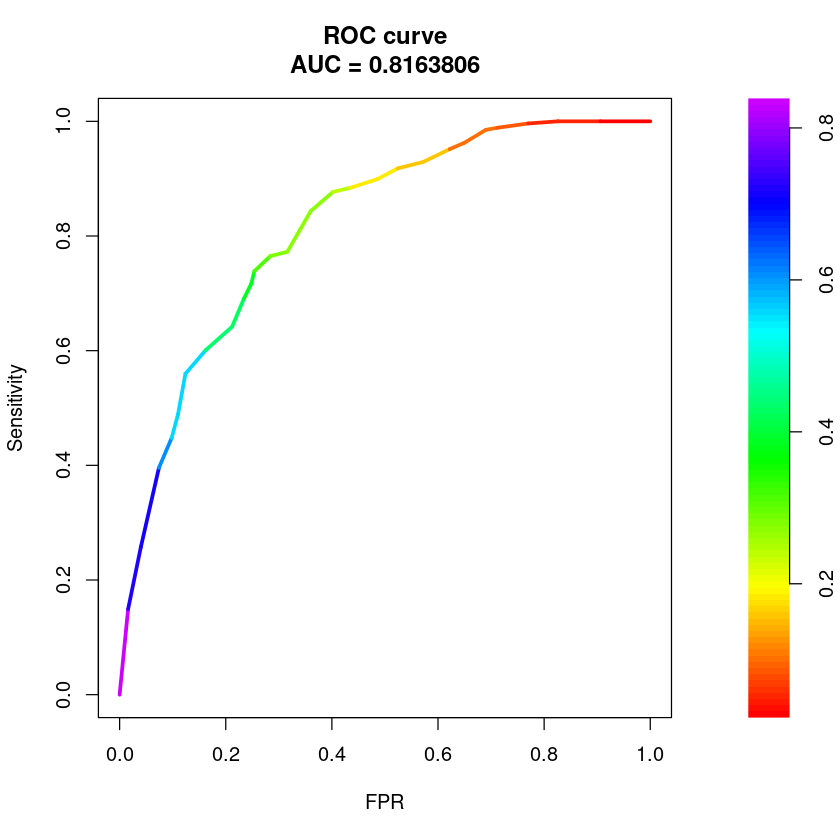

In [61]:
logist=glm(diabetes~., data=x, family="binomial")
ans=predict(logist, type="response")
plot(roc.curve(scores.class0=ans, weights.class0=x$diabetes, curve=TRUE))

Качество еще немного упало, но не сильно

# Задание 3

# Задание 4

Рассмотрим базу данных [LifeCycleSavings](https://stat.ethz.ch/R-manual/R-patched/library/datasets/html/LifeCycleSavings.html), содержащую информацию о среднем коэффициенте персональных сбережениях жителей 50 стран. Этот коэффициент для конкретного жителя вычисляется как отношение его совокупных личных сбережений к располагаемому доходу. Согласно гипотезе Модильяни, среднее по стране значение этого коэффициента зависит от
* процента населения моложе 15 лет -- `LifeCycleSavings$pop15`
* процента населения старше 75 лет -- `LifeCycleSavings$pop75`
* располагаемого дохода на душу населения -- `LifeCycleSavings$dpi`
* процентной скорости изменения располагаемого дохода на душу населения -- `LifeCycleSavings$ddpi`

Представленные данные являются усреднёнными показателями за
1960–1970 гг.

In [72]:
data(LifeCycleSavings)
head(LifeCycleSavings)
dim(LifeCycleSavings)

,sr,pop15,pop75,dpi,ddpi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43


[1] 50  5

### Пункт 1
Для переменных `sr`(как $y$-переменной) и `pop15` (как $x$-переменной) постройте ядерную оценку регрессии при различных вариантах выбора ядра (гауссовское ядро и ядро Епанечникова) и различных методах выбора параметра bandwidth (критерий Акаике, обобщённый метод кросс-проверки). Найдите наилучший метод в смысле наименьшей среднеквадратичной ошибки.

In [3]:
# install.packages("np")
library(np)

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-17)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]



Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”


14.60803,14.60803
14.57089,14.57089


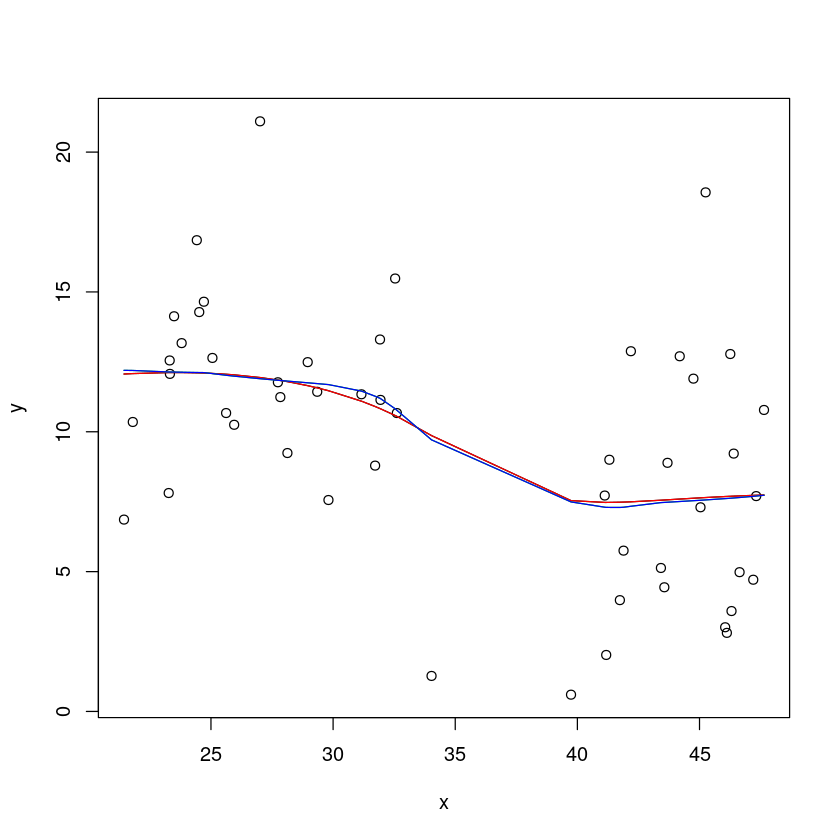

In [35]:
x = LifeCycleSavings$pop15
y = LifeCycleSavings$sr

ker <- c("gaussian", "epanechnikov")
band <- c("cv.ls", "cv.aic")
mse <- array(data = NA, c(length(ker), length(band)))
n <- 1
y <- y[order(x)]
x <- sort(x)
for (i in 1:length(ker)) {
  for (j in 1:length(band)) {
      NW <- npreg(txdat = x, tydat = y, ckertype = ker[i], bw = band[j])
      mse[i, j] <- mean((y - fitted(NW))^2)
      if (i * j == 1) {
        plot(x, y)
        points(x, fitted(NW), col = n, type = "l", labels = paste(ker[i], band[j]))
      } else {
        n <- n + 1
        points(x, fitted(NW), col = n, type = "l")
      }
    }
}
mse


Наименьшая ошибка = 14.57

### Пункт 2
Повторите вычисления для остальных трёх объясняющих переменных вместо "pop15". Выберите 2 переменные, которые по Вашему мнению наилучшим образом объясняют коэффициент персональных сбережений (в дальнейшем эти перемен- ные будем называть V1 и V2). Объясните свой выбор.

`pop75`

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”


17.38385,17.38385
15.25950,15.25950


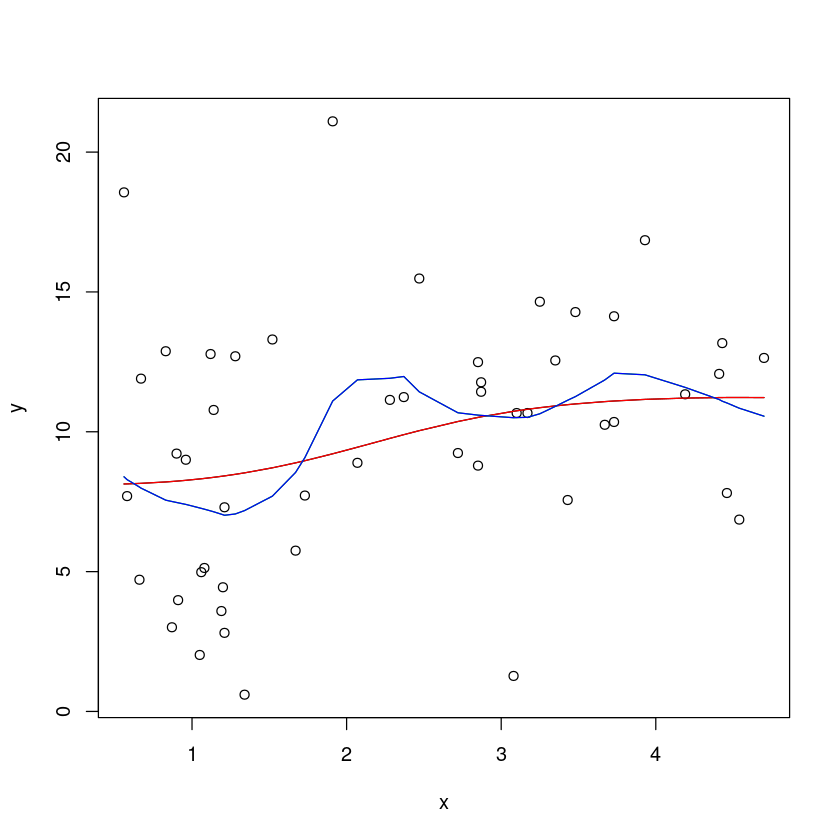

In [51]:
x = LifeCycleSavings$pop75
y = LifeCycleSavings$sr

ker <- c("gaussian", "epanechnikov")
band <- c("cv.ls", "cv.aic")
mse <- array(data = NA, c(length(ker), length(band)))
n <- 1
y <- y[order(x)]
x <- sort(x)
for (i in 1:length(ker)) {
  for (j in 1:length(band)) {
      NW <- npreg(txdat = x, tydat = y, ckertype = ker[i], bw = band[j])
      mse[i, j] <- mean((y - fitted(NW))^2)
      if (i * j == 1) {
        plot(x, y)
        points(x, fitted(NW), col = n, type = "l", labels = paste(ker[i], band[j]))
      } else {
        n <- n + 1
        points(x, fitted(NW), col = n, type = "l")
      }
    }
}
mse


Наименьшая ошибка = 15.25

`dpi`

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”


14.45897,14.45897
15.87978,15.87978


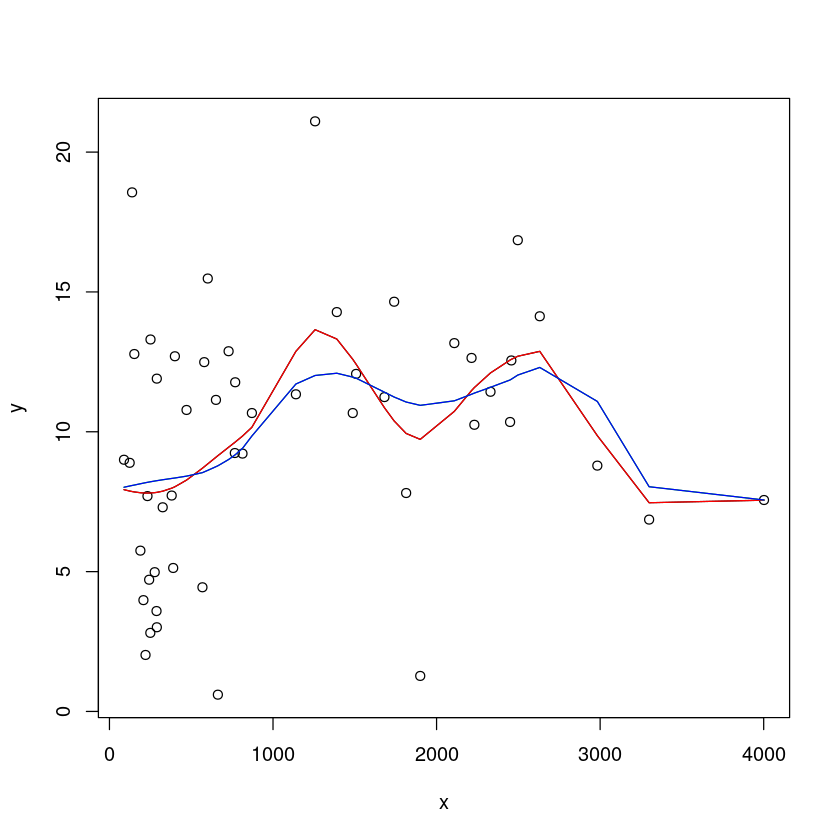

In [52]:
x = LifeCycleSavings$dpi
y = LifeCycleSavings$sr

ker <- c("gaussian", "epanechnikov")
band <- c("cv.ls", "cv.aic")
mse <- array(data = NA, c(length(ker), length(band)))
n <- 1
y <- y[order(x)]
x <- sort(x)
for (i in 1:length(ker)) {
  for (j in 1:length(band)) {
      NW <- npreg(txdat = x, tydat = y, ckertype = ker[i], bw = band[j])
      mse[i, j] <- mean((y - fitted(NW))^2)
      if (i * j == 1) {
        plot(x, y)
        points(x, fitted(NW), col = n, type = "l", labels = paste(ker[i], band[j]))
      } else {
        n <- n + 1
        points(x, fitted(NW), col = n, type = "l")
      }
    }
}
mse


Наименьшая ошибка 14.45

`ddpi`

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”


14.6912,14.6912
13.8081,13.8081


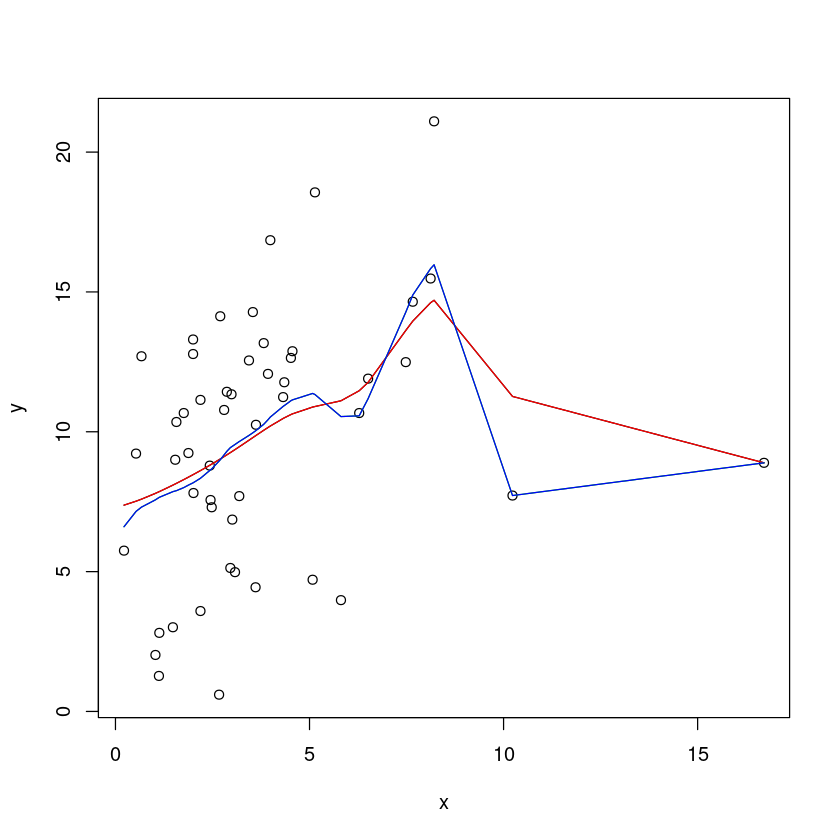

In [53]:
x = LifeCycleSavings$ddpi
y = LifeCycleSavings$sr

ker <- c("gaussian", "epanechnikov")
band <- c("cv.ls", "cv.aic")
mse <- array(data = NA, c(length(ker), length(band)))
n <- 1
y <- y[order(x)]
x <- sort(x)
for (i in 1:length(ker)) {
  for (j in 1:length(band)) {
      NW <- npreg(txdat = x, tydat = y, ckertype = ker[i], bw = band[j])
      mse[i, j] <- mean((y - fitted(NW))^2)
      if (i * j == 1) {
        plot(x, y)
        points(x, fitted(NW), col = n, type = "l", labels = paste(ker[i], band[j]))
      } else {
        n <- n + 1
        points(x, fitted(NW), col = n, type = "l")
      }
    }
}
mse


Наименьшая ошибка = 13.8081

Возьмем переменные `ddpi` и `dpi`, так как они дают наименьшую ошибку

### Пункт 3

На основе V1 и V2 постройте многомерную регрессию методом LOESS и линейную регрессию. Разделите случайным образом все страны на 2 группы: в одну группу отнесите примерно 80% стран, в другую - 20 %. Оцените параметры модели LOESS и линейной регрессии по большей группе и проверьте качество моделей по меньшей. Выясните, какая из построенных моделей является более точной.

In [59]:
# install.packages("fANCOVA")
library(fANCOVA)

Installing package into ‘/home/alexkkir/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

fANCOVA 0.6-1 loaded



In [119]:
# split LifeCycleSavings into train and test in ratio 80 vs 20
set.seed(123)
train = sample(1:nrow(LifeCycleSavings), 0.8 * nrow(LifeCycleSavings))
test = setdiff(1:nrow(LifeCycleSavings), train)

# train
x_train = LifeCycleSavings[train, c("dpi", "ddpi")]
y_train = LifeCycleSavings[train, "sr"]
x_test = LifeCycleSavings[test, c("dpi", "ddpi")]
y_test = LifeCycleSavings[test, "sr"]

In [123]:
model <- loess(sr~dpi+ddpi, data = LifeCycleSavings)
summary(model)

Call:
loess(formula = sr ~ dpi + ddpi, data = LifeCycleSavings)

Number of Observations: 50 
Equivalent Number of Parameters: 9.94 
Residual Standard Error: 4.133 
Trace of smoother matrix: 11.74  (exact)

Control settings:
  span     :  0.75 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE FALSE
drop.square:  FALSE FALSE 

In [124]:
mean((y_train - predict(model, x_train))^2) 
mean((y_test - predict(model, x_test))^2)

[1] 12.97155

[1] 10.39277

Получилась модель, которая имеет еще меньшую ошибку, чем модели ядровой регрессии. Теперь обучим обычную линейную регрессию

In [126]:
# train linear model
model <- lm(sr~dpi+ddpi, data = LifeCycleSavings)
summary(model)


Call:
lm(formula = sr ~ dpi + ddpi, data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9650 -4.0397  0.8684  2.2491  9.3145 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.3598478  1.2520610   5.080 6.43e-06 ***
dpi         0.0011949  0.0006091   1.962   0.0557 .  
ddpi        0.5292495  0.2102883   2.517   0.0153 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.189 on 47 degrees of freedom
Multiple R-squared:  0.1616,	Adjusted R-squared:  0.1259 
F-statistic: 4.528 on 2 and 47 DF,  p-value: 0.01591


In [128]:
mean((y_train - predict(model, x_train))^2)
mean((y_test - predict(model, x_test))^2)

[1] 16.44768

[1] 16.68109

Получилось немного хуже, чем для LOESS. Возрасла ошибка и на тренировочной, и на тестовой выборках

# Задание 5

Пусть дан набор точек $(x_i, y_i)_{i=1}^n$. Для описания регрессионной зависимости между $y_i$ и $x_i$ будем использовать оценку Надарая-Ватсона
$$
\hat r(x)= {\sum_{i=1}^n y_i K \left( {x - x_i \over h} \right) \over \sum_{i=1}^n K \left( {x - x_i \over h}\right)}
$$
с треугольным ядром
$$
K(x) = (1 - |x|) \cdot \mathbb{I} \left[|x| \leqslant 1\right]
$$
и параметром $h > 0$. Для случая $n=6, \ x_i = i$ вычислите сглаживающую матрицу $L$ и эффективное количество степеней свободы, если
1. $h = 1 / 2$
2. $h = 3 / 2$

### Пункт 1
Найдем чему равно $K \left( {x - x_i \over h} \right)$ при $x = x_1, \dots x_n$
* $x = x_i \Rightarrow K(\dots) = K(0) = 1$
* $|x - x_i| \geqslant 1 \Rightarrow |x - x_i| \geqslant 1 \Rightarrow {(x - x_i) / h} \geqslant 2 \cdot 1 \Rightarrow K(\dots) = 0$

Найдем чему равно значение, предсказанное регрессией:
$$
\hat r(x_k) = {\sum_{i=1}^n y_i K \left( {x_k - x_i \over h} \right) \over \sum_{i=1}^n K \left( {x_k - x_i \over h}\right)} = { y_k \cdot 1 \over 1} = y_k
$$
Таким образом, для объектов с признаками $x_1, \dots x_n$ регрессия просто предскажет их целевые значение $y_1, \dots y_n$, то есть она отработает как тождественное преобразование. Значит, $L = I$

### Пункт 2
Найдем чему равно $K \left( {x - x_i \over h} \right)$ при $x = x_1, \dots x_n$
* $x = x_i \Rightarrow K(\dots) = K(0) = 1$
* $|x - x_i| = 1 \Rightarrow K (\dots) = K(1 / h) = K(2 / 3) = 1 / 3$
* $|x - x_i| \geqslant 2 \Rightarrow (x -x_i) / h \geqslant {2 \over {3 / 2}} \geqslant {4 / 3} \Rightarrow K(\dots) = 0$

Найдем чему равно значение, предсказанное регрессией
1. $k \in \overline{2, n - 1}$
    $$ 
    \hat r(x_k) = {\sum_{i=1}^n y_i K \left( {x_k - x_i \over h} \right) \over \sum_{i=1}^n K \left( {x_k - x_i \over h}\right)} = {{1 \over 3} y_{k - 1} + y_k + {1 \over 3} y_{k + 1} \over {5 \over 3}} = {1 \over 5} y_{k - 1} + {3 \over 5} y_k + {1 \over 5} y_{k + 1} 
    $$
2. $k = 1$
    $$
    \hat r(x_k) = {\sum_{i=1}^n y_i K \left( {x_k - x_i \over h} \right) \over \sum_{i=1}^n K \left( {x_k - x_i \over h}\right)} = {y_k + {1 \over 3} y_{k + 1} \over {4 \over 3}} = {3 \over 4} y_k + {1 \over 4} y_{k + 1}
    $$
2. $k = n$
    $$
    \hat r(x_k) = {\sum_{i=1}^n y_i K \left( {x_k - x_i \over h} \right) \over \sum_{i=1}^n K \left( {x_k - x_i \over h}\right)} = {{1 \over 3} y_{k - 1} + y_k \over {4 \over 3}} = {1 \over 4} y_{k - 1} + {3 \over 4} y_k
    $$

Таким образом,
$$
L = \begin{bmatrix} {3 \over 4} & {1 \over 4} & 0 & \cdots & 0 & 0 & 0 \\ {1 \over 5} & {3 \over 5} & {1 \over 5} &  \cdots & 0 & 0 & 0 \\ 0 & {1 \over 5} & {3 \over 5} &  \ddots & 0 & 0 & 0 \\ \vdots & \vdots & \ddots &  \ddots & \vdots & \vdots & \vdots \\ 0 & 0 & 0 &  \cdots & {3 \over 5} & {1 \over 5} & 0 \\ 0 & 0 & 0 &  \cdots & {1 \over 5} & {3 \over 5} & {1 \over 5} \\ 0 & 0 & 0 &  \cdots & 0 & {1 \over 4} & {3 \over 4} \\ \end{bmatrix}
$$
что непосредственно следует из определения линейного сглаживателя:
$$
\hat {\bar y} = L \bar y
$$